# Sensitivity to Latent Dimension (Figure 8)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import utils

In [2]:
plt.rcParams["font.size"] = 21
plt.rcParams["legend.fontsize"] = 21

In [3]:
LATENT_DIMS = {
    128: "$d=128$",
    256: "$d=256$",
    512: "$d=512$",
    1024: "$d=1024$",
}

COLORS = {
    "$d=128$": "#ff7f00",
    "$d=256$": "#984ea3",
    "$d=512$": "green",
    "$d=1024$": "#e41a1c",
}

main_envs = [
    "reacher-hard",
    "walker-walk",
    "dog-run",
    "humanoid-walk",
]
main_envs.sort()

YLABELS = {
    "episode_reward": "Episode Return",
    "active_percent": "Codebook Active Percent (\%)",
    "rank1": "Matrix Rank",
}

In [4]:
df = pd.read_csv("../data/sensitivity/latent-dimension.csv")

In [5]:
# Convert env step to (1e3)
df.loc[:, "env_step"] = df["env_step"] // 1000

# Format latent dimension
df["latent_dim"] = df["latent_dim"].replace(LATENT_DIMS)

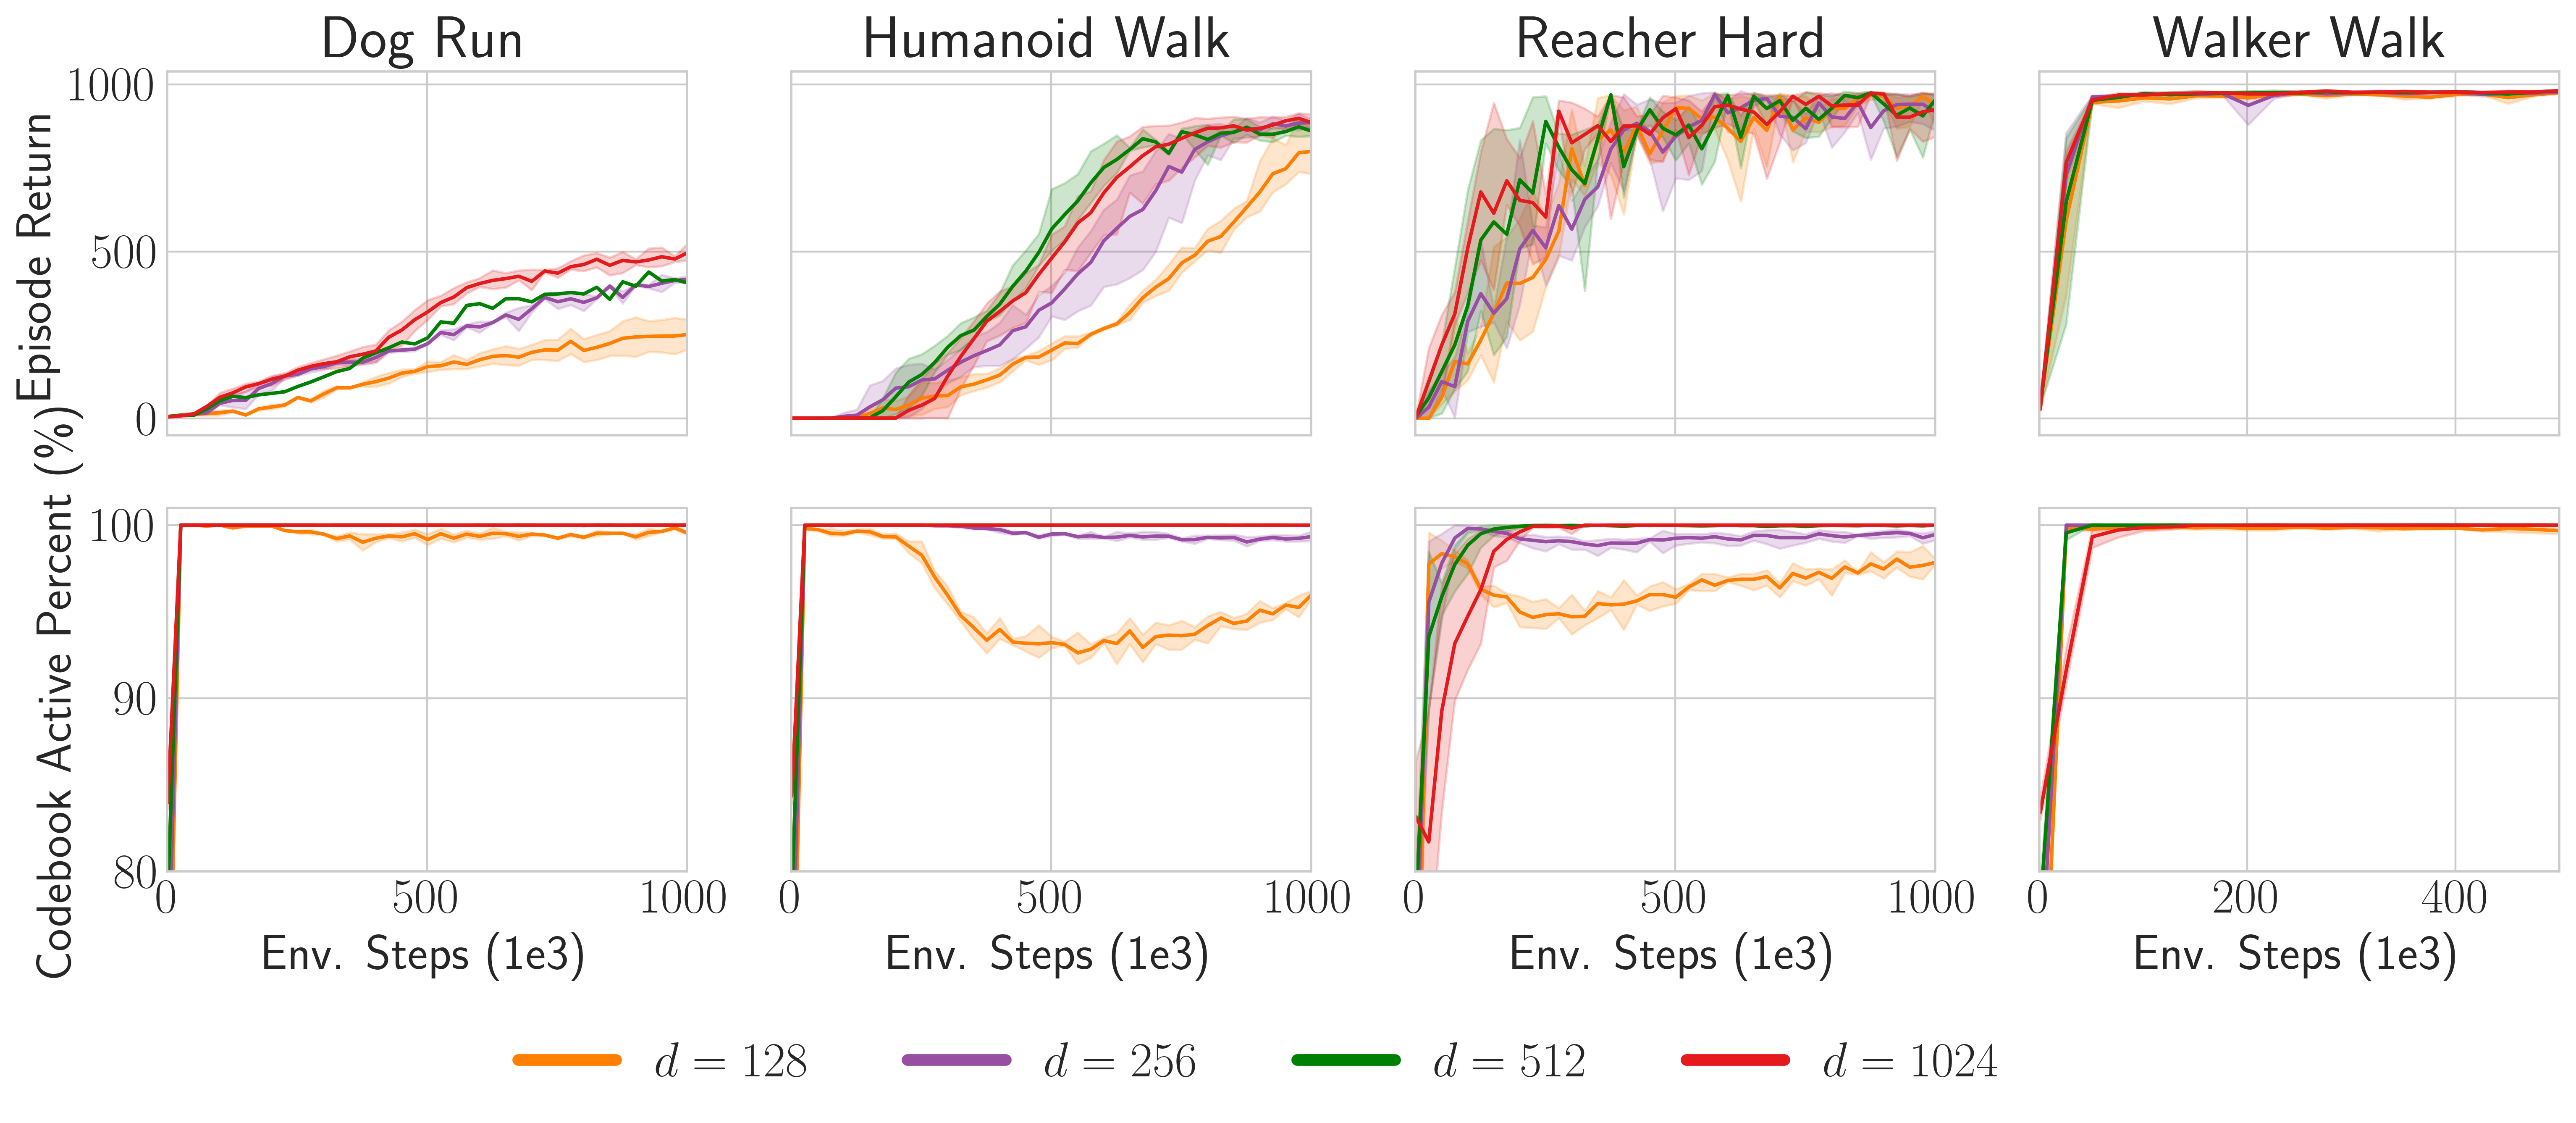

In [6]:
def plot_latent_dim(df):
    keys = ["episode_reward", "active_percent"]
    ncol = 4
    nrow = len(keys)
    fig, axs = plt.subplots(
        nrow,
        ncol,
        figsize=(4 * ncol, 3.5 * nrow),
        sharex="col",
        sharey="row",
    )
    
    for r, key in enumerate(keys):
        for idx, env in enumerate(main_envs):
            data = df[df["env"] == env]
            col = idx % ncol
            ax = axs[r, col]
            hue_order = data.latent_dim.unique()

            legend = (
                True if (idx == len(main_envs) - 1) and (r == len(keys) - 1) else False
            )
            g = sns.lineplot(
                x="env_step",
                y=key,
                data=data,
                errorbar=("ci", 95),
                hue="latent_dim",
                hue_order=hue_order,
                palette=COLORS,
                legend="auto" if legend else None,
                ax=ax,
            )

            if not r:
                ax.set_title(" ".join([ele.capitalize() for ele in env.split("-")]))
            if r == len(keys) - 1:
                ax.set_xlabel("Env. Steps (1e3)")
            else:
                ax.set_xlabel("")
            if env in ["walker-walk"]:
                g.set_xlim(0, 500)
            else:
                g.set_xlim(0, 1000)
            if key == "active_percent":
                g.set_ylim(80, 101)
            ax.set_ylabel("")
        axs[r][0].set_ylabel(YLABELS[key])

    l = axs[-1, -1].legend(
        loc="upper center",
        bbox_to_anchor=(-1.5, -0.35),
        fancybox=False,
        shadow=False,
        ncol=len(df.latent_dim.unique()),
    )
    for line in l.get_lines():
        line.set_linewidth(5.0)
    plt.subplots_adjust(bottom=0.2, right=0.97, left=0.08)

    plt.savefig(f"./figs/sensitivity-to-latent-dim.pdf")

plot_latent_dim(df)